<a href="https://colab.research.google.com/github/ElianaYemira/ProyectoFinal_IC/blob/main/TrabajoFinal_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Logística múltiple**
Curso: Inteligencia Computacional 

Docente: Rueslas Acero Donia Alizandra

Presentado por: 


*   Ayala Polloyqueri Juan Carlos  
*   Mamani Cartagena Eliana Yemira



# Importando librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Importando datos

In [2]:
# Datos
# ==============================================================================
#Para poder utilizar el modelo de regresión lógica, solo se esrá utilizando la base de datos con 5000 datos.
datos = pd.read_csv('/content/datasetshopping1.csv');                                    

In [3]:
datos.head(10)      #Mostrando las 10 primeras filas de la base de datos  

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,type
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,2,nonspam
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,2,nonspam
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,2,nonspam
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,2,nonspam
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,nonspam
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,2,nonspam
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,2,nonspam
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,1,nonspam
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,2,nonspam
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,2,nonspam


In [4]:
#Utilizamos la columna Revenue que por comodidad le cambiamos el nombre a type
#Con el fin de codificar la respuesta de cada fila como 1 si es TRUE(spam) y 0 si es FALSE(nonspam)
datos['type'] = np.where(datos['type'] == 'spam', 1, 0)

print("Número de observaciones por clase")
print(datos['type'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * datos['type'].value_counts(normalize=True))

Número de observaciones por clase
0    4491
1     508
Name: type, dtype: int64

Porcentaje de observaciones por clase
0    89.837968
1    10.162032
Name: type, dtype: float64


In [5]:
datos

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,type
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,2,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,2,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4,417.0,0,0.0,3,344.500000,0.000000,0.040000,0.000000,0.0,5,2,2,1,3,1,2,0
4995,1,7.0,0,0.0,9,160.500000,0.000000,0.025000,0.000000,0.0,5,2,2,2,3,2,2,0
4996,0,0.0,0,0.0,30,586.533333,0.000000,0.003448,30.877241,0.2,5,2,2,2,2,1,2,1
4997,2,11.0,1,0.0,35,1557.166667,0.005556,0.024074,0.000000,0.0,5,2,4,3,3,2,2,0


In [6]:
#Describimos la información estadística básica de nuestro set de datos.
#La Media, el Desvio, el Estandar, valores Mínimo y Másimo de cada característica.
datos.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,type
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,1.894579,68.816322,0.406881,27.803943,23.262452,896.965894,0.025462,0.048074,4.784153,0.132066,4.126625,2.095219,2.321464,3.077415,3.904181,1.897179,1.772755,0.101620
std,2.942610,164.585916,1.140790,118.220169,28.472580,1249.687220,0.052759,0.052404,15.876549,0.275812,1.046235,0.768096,1.489755,2.310832,3.556583,0.303755,0.419094,0.302179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000176,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,142.500000,0.000000,0.014496,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,15.000000,473.500000,0.002326,0.028371,0.000000,0.000000,5.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,73.166667,0.000000,0.000000,30.000000,1180.500000,0.020000,0.057143,0.000000,0.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000,0.000000
max,24.000000,2156.166667,16.000000,1779.166667,440.000000,13430.976060,0.200000,0.200000,261.491286,1.000000,5.000000,8.000000,12.000000,9.000000,20.000000,2.000000,2.000000,1.000000


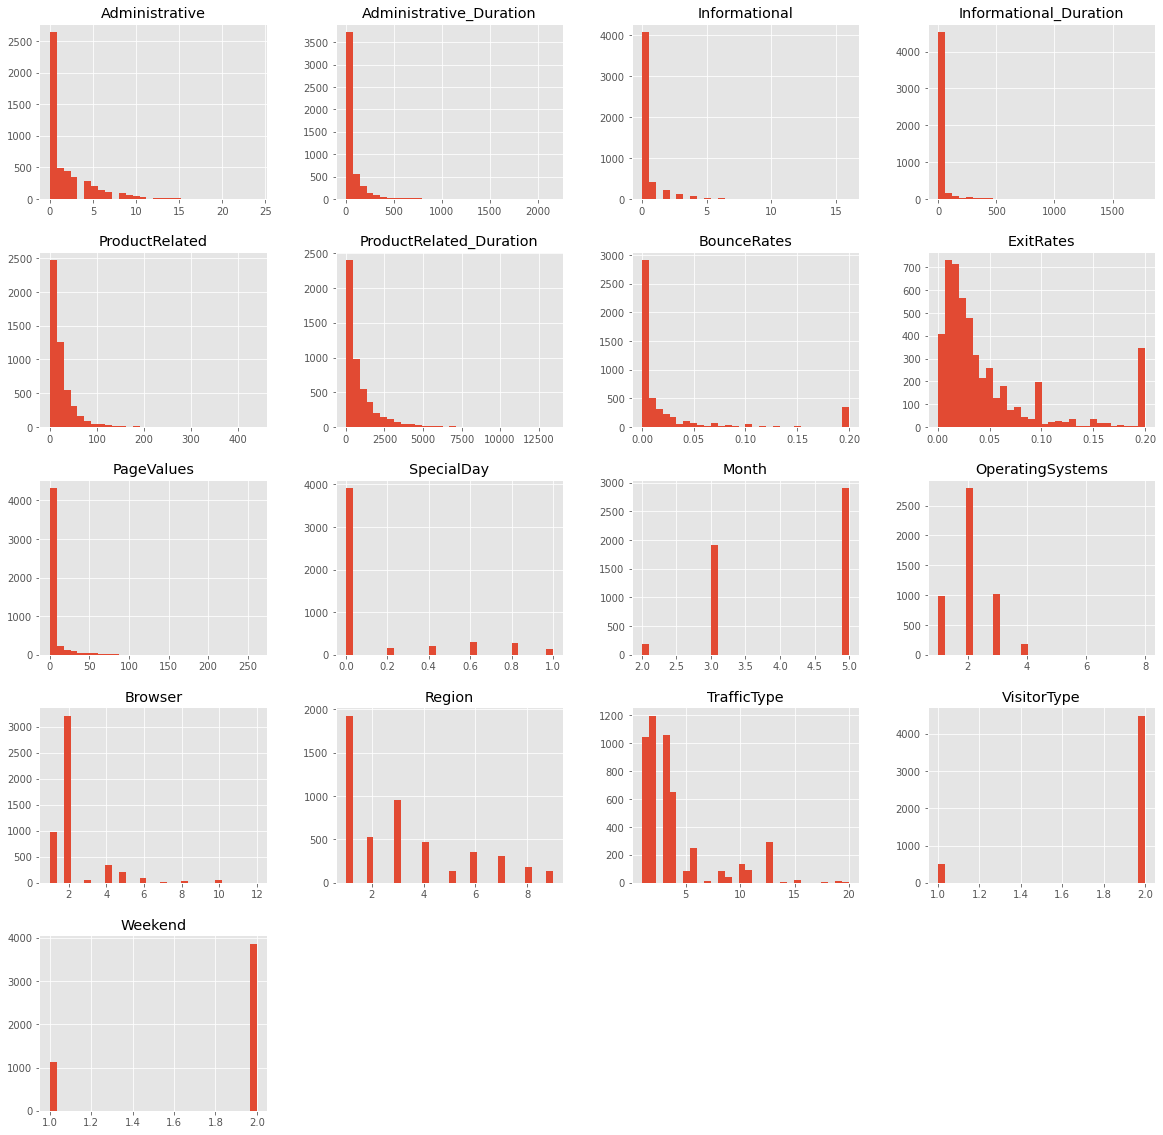

In [7]:
#Ver gráficamente los demás datos con respecto a Revenue(type)
#==================================================================================
datos.drop(['type'],1).hist(figsize=(20, 20), bins=30)
plt.show()

# Ajustando el modelo 

In [8]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'type')
y = datos['type']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [9]:
# Creación del modelo utilizando matrices de scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.172032
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3999
Model:                          Logit   Df Residuals:                     3981
Method:                           MLE   Df Model:                           17
Date:                Thu, 05 Jan 2023   Pseudo R-squ.:                  0.4796
Time:                        01:39:06   Log-Likelihood:                -687.96
converged:                       True   LL-Null:                       -1322.1
Covariance Type:            nonrobust   LLR p-value:                3.070e-259
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9820      0.618     -3.207      0.001      -3.193  

# Predicciones

In [10]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.predict(exog = X_train)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 0, ..., 0, 0, 0])

# Accuracy de test

In [11]:
#Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 93.5%


In [12]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,884,18
1,47,51
